In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
#cross validation pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
# evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# additional imports:
import re
import sys
from time import sleep
from tqdm.notebook import tqdm

In [2]:
hp=pd.read_csv(r"C:\Users\Ankur Srivastava\Documents\Python\Data\Train.csv")

In [3]:
hp.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
hp.shape

(13320, 9)

In [5]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
hp.dropna(inplace=True)

In [7]:
# FUNCTION to remove string from row values.
# Nan values will be replaced by 0
def remove_string(x):
    x = str(x)
    if x == 'nan':
        x = np.NaN
    else:
        x = int(x.split(" ")[0])
    return x


In [8]:
hp['BHK'] = hp['size'].apply(lambda x: remove_string(x))

In [9]:
hp.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


In [10]:
hp.drop(['availability','size','society'],axis=1)

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,2
11,Plot Area,Whitefield,2785,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...
13313,Super built-up Area,Uttarahalli,1345,2.0,1.0,57.00,3
13314,Super built-up Area,Green Glen Layout,1715,3.0,3.0,112.00,3
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2


In [11]:
hp.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [12]:
hp.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [13]:
hp.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi',
       'Lingadheeranahalli', 'Whitefield', '7th Phase JP Nagar',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Ramakrishnappa Layout', 'Binny Pete',
       'Thanisandra', ' Thanisandra', 'Electronic City',
       'Ramagondanahalli', 'Yelahanka', 'Hebbal', 'Kanakpura Road',
       'Kundalahalli', 'Sarjapur  Road', 'Ganga Nagar', 'Doddathoguru',
       'Adarsh Nagar', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Cholanayakanahalli', 'Kodanda Reddy Layout',
       'EPIP Zone', 'Dasanapura', 'Kasavanhalli', 'Sanjay nagar',
       'Kengeri', 'Yeshwanthpur', 'Chandapura', 'Kothanur',
       'Green View Layout', 'Shantiniketan Layout', 'Rajaji Nagar',
       'Devanahalli', 'Byatarayanapura', 'Akshaya Nagar',
       'LB Shastri Nagar', 'Hormavu', 'Peenya', 'Kudlu Gate',
       '8th Phase JP Nagar', 'Chandra Layout

In [14]:
location_stats = hp.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           397
Sarjapur  Road       310
Electronic City      236
Kanakpura Road       216
Thanisandra          212
                    ... 
Jeevan bima nagar      1
Jnana Ganga Nagar      1
Jogupalya              1
KPC Layout             1
 Banaswadi             1
Name: location, Length: 634, dtype: int64

In [15]:
def convert_rng_val(x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0])+float(values[1]))/2 #return float mean value of range
    try:
        return float(x) #return remaining values in float.
    except:
        return x #return other abnormal value as it is.

In [16]:
def sqmt_to_sqft(x):
    """convert sq.meters to sqft"""
    return x * 10.764

def sqyards_to_sqft(x):
    """convert sq.yards to sqft"""
    return x * 9

def gunta_to_sqft(x):
    """convert gunta to sqft"""
    return x * 1089

def acres_to_sqft(x):
    """convert acres to sqft"""
    return x * 43560

def perch_to_sqft(x):
    """convert perch to sqft"""
    return x * 272.25

def grounds_to_sqft(x):
    """convert grounds to sqft"""
    return x * 2400

def cents_to_sqft(x):
    """convert cents to sqft"""
    return x * 435.6

In [17]:
def clean_total_sqft(y):
    try:
        y = float(y)
    except:
        if "-" in y:
            y = round(convert_rng_val(y),1)
        elif "Sq. Meter" in y:
            y = round(sqmt_to_sqft(float(re.findall('\d+',y)[0])),1)
        elif "Sq. Yards" in y:
            y = sqyards_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Guntha" in y:
            y = gunta_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Acres" in y:
            y = acres_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Perch" in y:
            y = perch_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Grounds" in y:
            y = grounds_to_sqft(float(re.findall('\d+',y)[0])) 
        elif "Cents" in y:
            y = round(cents_to_sqft(float(re.findall('\d+',y)[0])),1)
        return y
    return y

In [18]:
# Lets clean our column and create a cleaned version of it:
hp['total_sqft_cleaned'] = hp['total_sqft'].apply(lambda x : clean_total_sqft(x))


In [19]:
# Remove unecessary columns:
hp = hp.drop(['size','total_sqft','area_type','availability','balcony','society'], axis=1)

In [20]:
hp.head()

,location,bath,price,BHK,total_sqft_cleaned
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0
5,Whitefield,2.0,38.00,2,1170.0
11,Whitefield,5.0,295.00,4,2785.0


In [21]:
# Creating new feature for detecting outliers:
hp['price_per_sqft'] = hp['price']*100000/hp['total_sqft_cleaned']
hp.head()

,location,bath,price,BHK,total_sqft_cleaned,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
5,Whitefield,2.0,38.00,2,1170.0,3247.863248
11,Whitefield,5.0,295.00,4,2785.0,10592.459605


In [22]:
hp['price_per_sqft'].describe()

count      7496.000000
mean       5991.420457
std        9153.321516
min          33.210897
25%        4276.133230
50%        5319.148936
75%        6703.573799
max      672727.272727
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'Count')

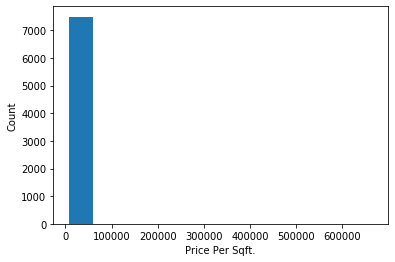

In [23]:
# Visualize to see number of data points for price_per_sqft
plt.hist(hp.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Sqft.")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

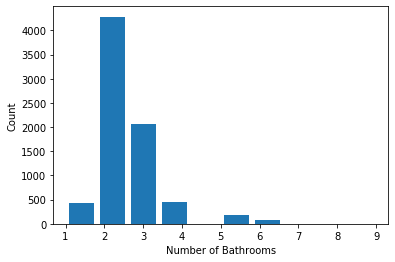

In [24]:
# Visualize to see data points based on number of bathrooms:
plt.hist(hp.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [25]:
hp1 = pd.get_dummies(data=hp,
columns = ['location'],
drop_first = True )

In [26]:
hp.head()

,location,bath,price,BHK,total_sqft_cleaned,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
5,Whitefield,2.0,38.00,2,1170.0,3247.863248
11,Whitefield,5.0,295.00,4,2785.0,10592.459605


In [27]:
# Independent variables:
X = hp1.drop('price', axis='columns')
X.head()

,bath,BHK,total_sqft_cleaned,price_per_sqft,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Rachenahalli,location_ Thanisandra,...,location_Volagerekallahalli,location_Whitefield,location_Wilson Garden,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_Yeshwanthpur Industrial Suburb
0,2.0,2,1056.0,3699.810606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4,2600.0,4615.384615,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3,1521.0,6245.890861,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,2,1170.0,3247.863248,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,5.0,4,2785.0,10592.459605,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
# Dependent Variable:
y = hp1['price']
y.head()

0      39.07
1     120.00
3      95.00
5      38.00
11    295.00
Name: price, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [30]:
# Linear Regression: 
from  sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f'Score: {lin_reg.score(X_test, y_test)}')

Score: -22745759079927.086


In [31]:
# K-fold validation for Linear Regression:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv1)

array([-2.69243439e+15, -3.57263982e-02, -3.70578269e+14,  5.83078734e-01,
       -5.69945316e+13])

In [32]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [33]:
def find_best_model_grid_search(X, Y,tqdm=tqdm):
    algos = {
        'Linear_regression' : {
            'model' : LinearRegression(),
            'params': {
                'normalize':[True, False]
             }
          },  
        'ElasticNet' : {
             'model' : ElasticNet(),
             'params' : {
                 "max_iter": [1, 5, 10],
                 'alpha': [0, 0.01, 0.02, 0.03, 0.05, 0.5, 1, 0.05, 0.1, 0.5, 1, 5, 10, 100],
                 'l1_ratio': np.arange(0.0, 1.0, 0.1),
                 'normalize':[True, False]
             } 
         },
          'Decision_tree': {
              'model': DecisionTreeRegressor(),
              'params': {
                  'criterion' : ['mse', 'friedman_mse'],
                  'splitter': ['best', 'random']
              }
          }
    }
     
    values = (algos.items())
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    print(f'Grid Search CV Initiated..' )    
    with tqdm(total=len(values), file=sys.stdout) as pbar:
        for algo_name, config in algos.items():
            pbar.set_description('Processed')
            gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
            gs.fit(X,Y)
            scores.append({
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            })
            pbar.update(1)
            print(f'Grid search CV for {algo_name} done')
        print("Grid Search CV completed!")
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [34]:
models = find_best_model_grid_search(X, y)
models

Grid Search CV Initiated..


Grid search CV for Linear_regression done


C:\Users\Ankur Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ankur Srivastava\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Ankur Srivastava\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14555443.24204418, tolerance: 6982.361277654061
  positive)
C:\Users\Ankur Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_

Grid search CV for ElasticNet done
Grid search CV for Decision_tree done
Grid Search CV completed!



,model,best_score,best_params
0,Linear_regression,-6.240014e+14,{'normalize': False}
1,ElasticNet,5.906330e-01,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1..."
2,Decision_tree,9.647457e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [35]:
# Decision_Tree best parameters:
models.loc[2]['best_params']

{'criterion': 'friedman_mse', 'splitter': 'best'}

In [36]:
# Re-train using best parameter:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [37]:
# Prediction:
ypred = model.predict(X_test)

Text(0, 0.5, 'Actual Price')

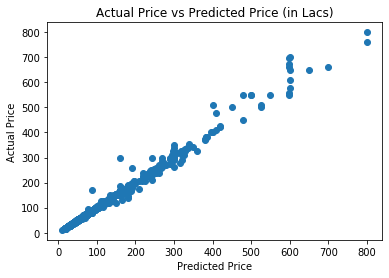

In [38]:
# Visualising the test vs predicted data:
plt.scatter(ypred, y_test)
plt.title('Actual Price vs Predicted Price (in Lacs)')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

In [39]:
# Calculate the absolute errors
errors = abs(ypred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.56 degrees.


In [40]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.29 %.
